In [10]:
import pandas as pd
df = pd.read_csv('datasets/inadimplentes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   score_credito  1000 non-null   int64
 1   idade          1000 non-null   int64
 2   inadimplente   1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [11]:
df['inadimplente'].value_counts(normalize=True)

inadimplente
0    0.857
1    0.143
Name: proportion, dtype: float64

In [12]:
X= df.drop('inadimplente', axis=1)
Y= df['inadimplente']

In [13]:
from sklearn.metrics import (recall_score, precision_score, f1_score,
                            accuracy_score, confusion_matrix,
                            roc_auc_score, RocCurveDisplay)
import matplotlib.pyplot as plt
from IPython.display import display

def avalia_modelo(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Recall': recall_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Acurácia': accuracy_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }

    print("\nMatriz de Confusão:")
    display(pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['Previsto Não', 'Previsto Sim'],
             index=['Real Não', 'Real Sim']))

    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title('Curva ROC')
    plt.show()

    return pd.DataFrame([metrics])


Matriz de Confusão:


/home/dede/DataAnalisys/JupyterVenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Previsto Não,Previsto Sim
Real Não,257,0
Real Sim,43,0


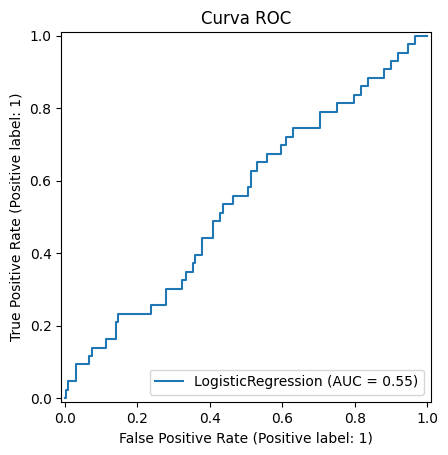

,Recall,Precisão,F1-Score,Acurácia,AUC-ROC
0,0.0,0.0,0.0,0.856667,0.546647


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
modelo = LogisticRegression()
holoutMetricas= avalia_modelo(X_train, X_test, y_train, y_test, modelo)
holoutMetricas


In [6]:
from sklearn.model_selection import KFold, cross_validate

#validacao cruzada tradicional
kf =KFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = cross_validate(modelo, X, Y, cv=kf, scoring=['recall', 'precision', 'f1', 'accuracy', 'roc_auc'], return_train_score=False)
print("---Metricas KFold normal")
kfold_metricas = pd.DataFrame(
    {
      'Recall': cv_metrics['test_recall'],
      'Precisao': cv_metrics['test_precision'],
      'F1_score': cv_metrics['test_f1'],
      'Acuracia': cv_metrics['test_accuracy'],
      'AUC_ROC': cv_metrics['test_roc_auc']
    }
)
kfold_metricas

---Metricas KFold normal


/home/dede/DataAnalisys/JupyterVenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dede/DataAnalisys/JupyterVenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dede/DataAnalisys/JupyterVenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

,Recall,Precisao,F1_score,Acuracia,AUC_ROC
0,0.0,0.0,0.0,0.820,0.381436
1,0.0,0.0,0.0,0.880,0.621922
2,0.0,0.0,0.0,0.840,0.506789
3,0.0,0.0,0.0,0.880,0.494318
4,0.0,0.0,0.0,0.865,0.413402


In [7]:
display(kfold_metricas.describe().loc[['mean', 'std']])

,Recall,Precisao,F1_score,Acuracia,AUC_ROC
mean,0.0,0.0,0.0,0.857000,0.483574
std,0.0,0.0,0.0,0.026363,0.093743


#stratify

In [8]:
from sklearn.model_selection import StratifiedKFold
skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics_skf = cross_validate(modelo, X, Y, cv=skf, scoring=['recall', 'precision', 'f1', 'accuracy', 'roc_auc'], return_train_score=False)
print("---Metricas KFold estrarificado")
skf_metricas = pd.DataFrame(
    {
      'Recall': cv_metrics_skf['test_recall'],
      'Precisao': cv_metrics_skf['test_precision'],
      'F1_score': cv_metrics_skf['test_f1'],
      'Acuracia': cv_metrics_skf['test_accuracy'],
      'AUC_ROC': cv_metrics_skf['test_roc_auc']
    }
)
skf_metricas

---Metricas KFold estrarificado


/home/dede/DataAnalisys/JupyterVenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dede/DataAnalisys/JupyterVenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dede/DataAnalisys/JupyterVenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

,Recall,Precisao,F1_score,Acuracia,AUC_ROC
0,0.0,0.0,0.0,0.860,0.580357
1,0.0,0.0,0.0,0.860,0.442276
2,0.0,0.0,0.0,0.855,0.558782
3,0.0,0.0,0.0,0.855,0.509377
4,0.0,0.0,0.0,0.855,0.564227


KeyError: 'Precisao'

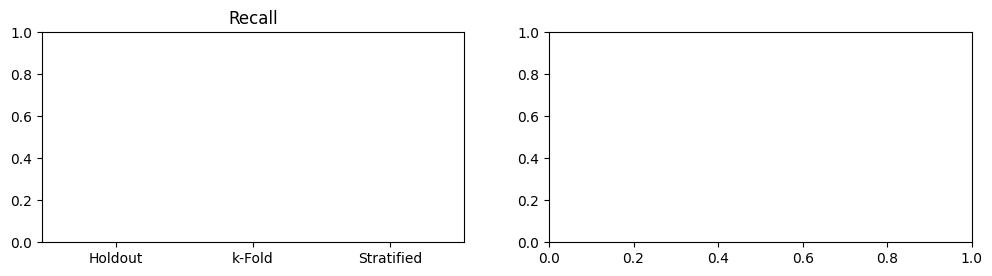

In [9]:
plt.figure(figsize=(12, 6))
metrics_list = ['Recall', 'Precisao', 'F1-Score', 'AUC-ROC']

for i, metric in enumerate(metrics_list, 1):
    plt.subplot(2, 2, i)
    plt.bar(['Holdout', 'k-Fold', 'Stratified'],
            [holoutMetricas[metric].values[0],
             kfold_metricas[metric].mean(),
             skf_metricas[metric].mean()])
    plt.title(metric)
    if metric == 'Recall':
        plt.ylim(0, 1)

plt.tight_layout()
plt.show()

**Exercício 1:** Até aqui, ficou claro que a melhor abordagem para este dataset é a validação cruzada estratificada, mesmo ela não possuindo a melhor curva ROC como podemos ver no gráfico 4. Isso acontece porque o modelo é mais robusto já que foi exposto a dados equilibrados e diferentes em cada fase de treino e teste. Partido desse cenário, tente realizar algum pré-processamento nos dados e verifique se as métricas melhoram ou pioram.

**Exercício 2:** Pegue o dataset ``Titanic`` que usamos na aula 3 e faça a previsão de quem sobreviveu e quem faleceu. Decida qual a melhor estratégia de validação e descreva suas conclusões parciais a cada célula do seu Google Colab. Faça as devidas transformações nos dados.